# Analyzing the segmentation results

In [1]:
import os
import numpy as np
import pdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
questions = {}
answers = {}
for root, dirs, files in os.walk("../../segments/"):
    for file in files:
        if file.endswith(".txt") :
            with open(os.path.join(root,file)) as f:
                this_files_text = f.read().lower().replace('<br>', ' ')
                this_files_text = this_files_text.replace('<br >', ' ')
                if 'context' in file:
                    questions[file.split('-')[0]] = this_files_text.split('\n')
                else:
                    if answers.get(file.split('_')[0]):
                        answers[file.split('_')[0]] += this_files_text
                    else:
                        answers[file.split('_')[0]] = this_files_text



In [3]:
replies = {}
import re
for key in answers.keys():
    replies[key] = {}
    split = re.split('-----------[-]+', answers[key])

    for reply in split:
        if reply=='\n':
            continue
        reply_num = reply.strip().split('\n')[0]
        replies[key][reply_num] = reply.strip().split('\n')[1:]

In [4]:
all_reply_segments = sum([[replies[rep_key][rep_num] for rep_num in replies[rep_key].keys()] for rep_key in replies.keys()], [])

In [5]:
for a,b in enumerate(all_reply_segments[0]):
    print(a,b)

0 parenthood :
1 you will never love and hate something so much .
2    i do n't think
3 any one is really prepared for kids .
4 there is n't an instruction manual
5 that comes with your baby .
6    i would say
7 wanting a kid
8 and having some type of plan
9 to deal with said
10 child is the most prepared you will ever be .
11    my kids are the most rewarding , exhausting , terrible things in my life .
12 i was not prepared for most of the things
13 my kids put me through ,
14 but even getting puked and shit on at 3 am is worth it .


In [6]:
sum(all_reply_segments,[])[0].split()

['parenthood', ':']

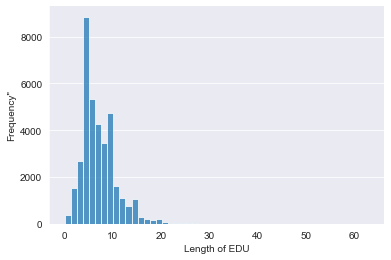

In [7]:
segment_lengths=[len(a.split()) for a in sum(all_reply_segments,[])]
sns.set_style("darkgrid")

fig = sns.distplot(segment_lengths, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Length of EDU', ylabel='Frequency"')
sns.despine()
fig.xaxis.grid(False)
# plt.xticks([0,20,40,60,80,100])
plt.savefig('figs/edu-lengths.png', dpi=600)

In [8]:
def is_it_a_discourse_marker(text, pos, word):
    if word in text[pos].split()[:2]:
        return True
    else:
        return False
        
    

though_positions_summed = sum([[(i*(100/len(rep))) for i,x in enumerate(rep) if is_it_a_discourse_marker(rep, i, 'though')] for rep in all_reply_segments], [])

# though_positions_lens = sum([[len(rep) for i,x in enumerate(rep) if is_it_a_discourse_marker(rep, i, 'though')] for rep in all_reply_segments], [])
# though_positions_lens

In [9]:
though_positions_summed

[63.63636363636364,
 84.61538461538461,
 81.25,
 42.10526315789474,
 93.75,
 40.0,
 0.0,
 45.45454545454546,
 45.45454545454546,
 37.5,
 50.0,
 94.11764705882354,
 17.647058823529413,
 25.0,
 45.45454545454546,
 55.55555555555556,
 85.71428571428572,
 60.0,
 63.15789473684211,
 22.22222222222222,
 92.3076923076923,
 5.0,
 75.0,
 66.66666666666666,
 70.0,
 61.53846153846154,
 61.53846153846154,
 11.764705882352942,
 20.0,
 73.91304347826086,
 14.285714285714286,
 44.44444444444444,
 93.75,
 45.0,
 62.5,
 70.0,
 75.0,
 83.33333333333333,
 46.66666666666667,
 12.5,
 77.77777777777777,
 60.0,
 75.0,
 30.76923076923077,
 41.1764705882353,
 75.0,
 45.0,
 31.25,
 95.23809523809524,
 85.29411764705883,
 16.666666666666668,
 6.666666666666667,
 70.37037037037037,
 50.0,
 85.71428571428572,
 62.068965517241374,
 92.5925925925926,
 61.11111111111111,
 68.18181818181819,
 26.315789473684212,
 9.090909090909092,
 85.71428571428572,
 28.571428571428573,
 85.71428571428572]

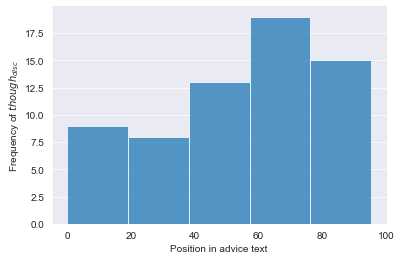

In [10]:
sns.set_style("darkgrid")

fig = sns.distplot(though_positions_summed, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Position in advice text', ylabel='Frequency of $though_{disc}$')
sns.despine()
fig.xaxis.grid(False)
plt.xticks([0,20,40,60,80,100])
plt.savefig('figs/edu-a-though-transparent.png', dpi=600, transparent=True)

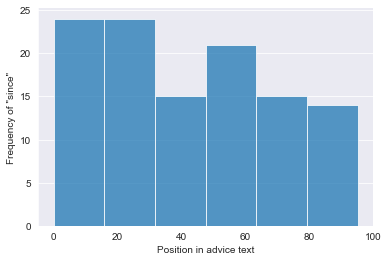

In [11]:
since_positions_summed = sum([[(i*(100/len(rep))) for i,x in enumerate(rep) if is_it_a_discourse_marker(rep, i, 'since')] for rep in all_reply_segments], [])
since_positions_summed

sns.set_style("darkgrid")

fig = sns.distplot(since_positions_summed, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Position in advice text', ylabel='Frequency of "since"')
sns.despine()
fig.xaxis.grid(False)

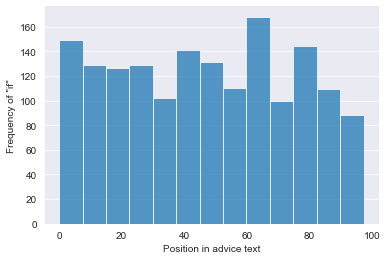

In [12]:
if_positions_summed = sum([[(i*(100/len(rep))) for i,x in enumerate(rep) if is_it_a_discourse_marker(rep, i, 'if')] for rep in all_reply_segments], [])
if_positions_summed

sns.set_style("darkgrid")

fig = sns.distplot(if_positions_summed, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Position in advice text', ylabel='Frequency of "if"')
sns.despine()
fig.xaxis.grid(False)

# Analysing question discourse segments 

(array([290., 134.,  32.,  10.,   5.,   1.,   1.,   1.,   0.,   2.]),
 array([  2. ,  30.8,  59.6,  88.4, 117.2, 146. , 174.8, 203.6, 232.4,
        261.2, 290. ]),
 <a list of 10 Patch objects>)

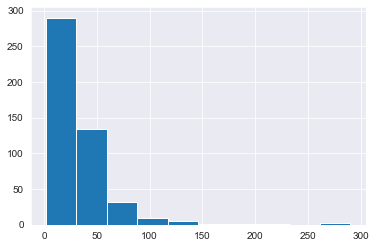

In [13]:
num_of_segments = {id: len(questions[id]) for id in questions.keys()}

plt.hist(num_of_segments.values())

In [14]:
or_positions_summed = sum([[i*(100/len(questions[ques_key])) for i,x in enumerate(questions[ques_key]) if is_it_a_discourse_marker(questions[ques_key], i, 'or')] for ques_key in questions.keys()], [])

In [15]:
or_positions_summed

[11.682242990654206,
 81.30841121495327,
 32.352941176470594,
 50.0,
 42.85714285714286,
 53.191489361702125,
 85.32608695652173,
 76.31578947368422,
 18.51851851851852,
 29.82456140350877,
 33.33333333333333,
 84.61538461538461,
 1.7857142857142858,
 92.85714285714286,
 64.51612903225806,
 67.74193548387096,
 25.714285714285715,
 51.64835164835165,
 73.62637362637363,
 92.30769230769232,
 94.5945945945946,
 34.09090909090909,
 91.42857142857143,
 50.0,
 12.903225806451612,
 32.8125,
 39.0625,
 59.45945945945946,
 75.67567567567568,
 27.5,
 72.5,
 85.0,
 33.33333333333333,
 87.5,
 36.8421052631579,
 9.090909090909092,
 56.75675675675676,
 91.89189189189189,
 56.52173913043478,
 94.20289855072464,
 0.0,
 89.6551724137931,
 83.87096774193547,
 33.333333333333336,
 55.55555555555556,
 93.33333333333334,
 74.46808510638297,
 76.59574468085106,
 83.33333333333333,
 33.333333333333336,
 75.0,
 67.5,
 68.57142857142857,
 77.14285714285714,
 81.42857142857143,
 91.42857142857143,
 4.5454545454

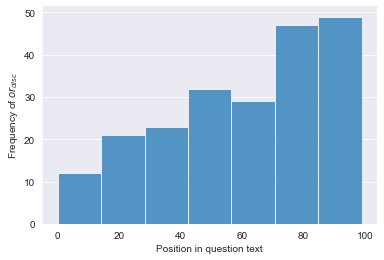

In [16]:
import seaborn as sns
sns.set_style("darkgrid")

fig = sns.distplot(or_positions_summed, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Position in question text', ylabel='Frequency of $or_{disc}$')
sns.despine()
fig.xaxis.grid(False)
plt.xticks([0,20,40,60,80,100])
plt.savefig('figs/edu-q-or.png', dpi=600)

# Comparing segments to annotations 